In [1]:
import os
import numpy as np
import mne
import osl
import yaml
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [4]:
event_dict = {
              'words/hungry': 2,
              'words/tired': 3,
              'words/thirsty': 4,
              'words/toilet': 5,
              'words/pain': 6}

raw = mne.io.read_raw_fif('/well/woolrich/projects/disp_csaky/RC/reading_only/sub_preproc25hz/oslpy/task_part1_rc_tsss_mc_preproc_raw.fif', preload=True)

outdir = outdir = "/well/woolrich/projects/disp_csaky/RC/reading_only/sub_preproc25hz"
events = mne.find_events(raw, min_duration=0.002)
epochs = mne.Epochs(raw,
                    events,
                    event_id=event_dict,
                    tmin=-0.1,
                    tmax=1.6,
                    baseline=None,
                    picks=['meg'],
                    reject=None,
                    preload=True)

for epoch, event in zip(epochs, epochs.events):
    data = epoch.T.astype(np.float32)

    event_id = event[-1]
    os.makedirs(f"{outdir}/cond{event_id-2}", exist_ok=True)
    n_trials = int(len(os.listdir(f"{outdir}/cond{event_id-2}")))
    np.save(f"{outdir}/cond{event_id-2}/trial{n_trials}.npy", data)

Opening raw data file /well/woolrich/projects/disp_csaky/RC/reading_only/sub_preproc25hz/oslpy/task_part1_rc_tsss_mc_preproc_raw.fif...
    Range : 1000 ... 1344999 =      1.000 ...  1344.999 secs
Ready.
Opening raw data file /well/woolrich/projects/disp_csaky/RC/reading_only/sub_preproc25hz/oslpy/task_part1_rc_tsss_mc_preproc_raw-1.fif...
    Range : 1345000 ... 2320999 =   1345.000 ...  2320.999 secs
Ready.
Reading 0 ... 2319999  =      0.000 ...  2319.999 secs...
Trigger channel has a non-zero initial value of 4 (consider using initial_event=True to detect this event)
2335 events found
Event IDs: [   1    2    3    4    5    6    9  256  512 1024 2048 2052 3072]
Not setting metadata
1039 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1039 events and 1701 original time points ...
7 bad epochs dropped


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [17, 12]

dataset_paths = [os.path.join('rich_data', 'subj2', 'sess4', 'task_part1_4_raw_tsss.fif'),
                 os.path.join('rich_data', 'subj2', 'sess4', 'task_part2_4_raw_tsss.fif'),
                 os.path.join('rich_data', 'subj2', 'sess4', 'task_part3_4_raw_tsss.fif')]
outdir = os.path.join('rich_data', 'subj2', 'sess4', 'oslpy_deb')

config_text = """
meta:
  event_codes:
    words/hungry: 2
    words/tired: 3
    words/thirsty: 4
    words/toilet: 5
    words/pain: 6
    think: 7
    cue: 8
    twords/hungry: 11
    twords/tired: 12
    twords/thirsty: 13
    twords/toilet: 14
    twords/pain: 15
preproc:
  - filter:         {l_freq: 1, h_freq: 250}
  - notch_filter:   {freqs: 50 100 150 200 250 300}
  - bad_channels:   {picks: 'grad'}
  - bad_segments:   {segment_len: 800, picks: 'grad'}
  - ica_raw:        {picks: 'meg', n_components: 64}
  - ica_autoreject: {picks: 'meg', ecgmethod: 'correlation', measure: 'correlation', threshold: 0.5, apply: False}
  - find_events:    {min_duration: 0.002}
"""

"""

"""

'\n\n'

In [33]:
raws = []
for d in dataset_paths:
    raws.append(mne.io.read_raw_fif(d, preload=False))
    print(raws[-1].info['dev_head_t'])
    raws[-1].info['dev_head_t'] = None
raws = mne.concatenate_raws(raws, preload=True)

/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_19523/1373352371.py:3: RuntimeWarning: This filename (rich_data/RC/task_part1_rc_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(d, preload=False))
/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_19523/1373352371.py:3: RuntimeWarning: This filename (rich_data/RC/task_part2_rc_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(d, preload=False))


<Transform | MEG device->head>
[[ 0.99979776 -0.00101681  0.02008924  0.00015774]
 [ 0.00101018  0.99999958  0.00034001 -0.0129973 ]
 [-0.02008957 -0.00031965  0.99979824  0.05569185]
 [ 0.          0.          0.          1.        ]]
<Transform | MEG device->head>
[[ 0.99965429 -0.0133717   0.02265613 -0.00022274]
 [ 0.01509374  0.99686873 -0.07762522 -0.01404838]
 [-0.0215472   0.07794032  0.99672556  0.05492038]
 [ 0.          0.          0.          1.        ]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

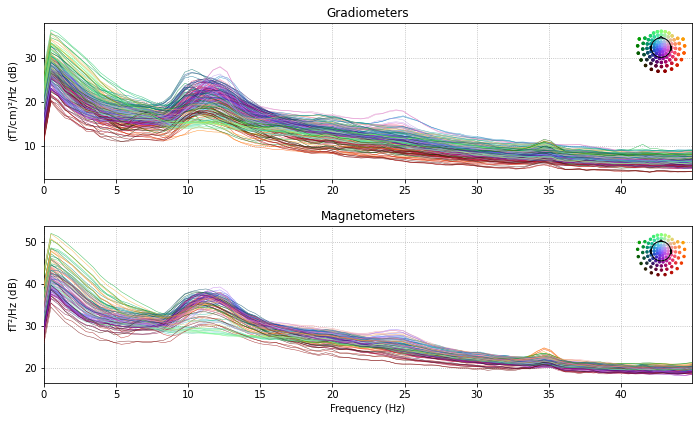

In [35]:
raws.plot_psd(fmax=45)

In [6]:
config = yaml.load(config_text, Loader=yaml.FullLoader)
dataset = osl.preprocessing.run_proc_chain(raws, config, outdir=outdir, overwrite=True)

task_part1_rc_raw_tsss_mc : OSL logger: handler 'console' level set to 'INFO'
task_part1_rc_raw_tsss_mc : logging to file: rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw.log
task_part1_rc_raw_tsss_mc : 2022-06-27 18:13:33 : Starting OSL Processing
task_part1_rc_raw_tsss_mc : input : <Raw | task_part1_rc_raw_tsss_mc.fif, 338 x 2856000 (2856.0 s), ~7.20 GB, data loaded>
task_part1_rc_raw_tsss_mc : MNE Stage - raw.filter
task_part1_rc_raw_tsss_mc : userargs: {'l_freq': 1, 'h_freq': 40}
task_part1_rc_raw_tsss_mc : MNE Stage - raw.notch_filter
task_part1_rc_raw_tsss_mc : userargs: {'freqs': '50 100'}
task_part1_rc_raw_tsss_mc : OSL Stage - raw : detect_badchannels
task_part1_rc_raw_tsss_mc : userargs: {'picks': 'mag'}
task_part1_rc_raw_tsss_mc : Modality mag - 2/102 channels rejected     (1.960784%)
task_part1_rc_raw_tsss_mc : OSL Stage - raw : detect_badchannels
task_part1_rc_raw_tsss_mc : userargs: {'picks': 'grad'}
task_part1_rc_raw_tsss_mc : Modality grad - 1/204 channels rejected

/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/osl/preprocessing/_mne_wrappers.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 40 Hz. The decim=10 parameter will result in a sampling frequency of 100 Hz, which can cause aliasing artifacts.
  dataset['epochs'] = mne.Epochs(dataset['raw'],


task_part1_rc_raw_tsss_mc : 2022-06-27 18:29:14 : Processing Complete


In [ ]:
# check drop log
for reason in dataset['epochs'].drop_log:
    if reason:
        if reason[0] != 'IGNORED':
            print(reason)

In [7]:
dataset_path = os.path.join('rich_data', 'RC', 'oslpy', 'task_part1_rc_tsss_mc_preproc_raw.fif')
osl.report.gen_report(dataset_path, outdir=os.path.dirname(dataset_path))

1 files to be processed. 1 good
task_part1_rc_raw_tsss_mc : IMPORTING: rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw.fif
task_part1_rc_raw_tsss_mc : Detected fif file format, using: mne.io.read_raw_fif
Processing : /Users/ricsi/Documents/GitHub/MEG-transfer-decoding/scripts/rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw.fif
Generating plots:
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_flowchart.png


/Users/ricsi/miniconda3/envs/main/lib/python3.8/site-packages/osl/preprocessing/batch.py:377: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_temporal_sumsq.png
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_bad_chans.png
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_channel_dev.png
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_spectra_full.png
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_spectra_zoom.png
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_digitisation.png
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_EOG.png
rich_data/RC/oslpy/task_part1_rc_tsss_mc_preproc_raw_ECG.png
REPORT : rich_data/RC/oslpy/osl_raw_report.html


In [8]:
ica = dataset['ica']

In [11]:
ica.exclude

[0, 30, 11, 47]

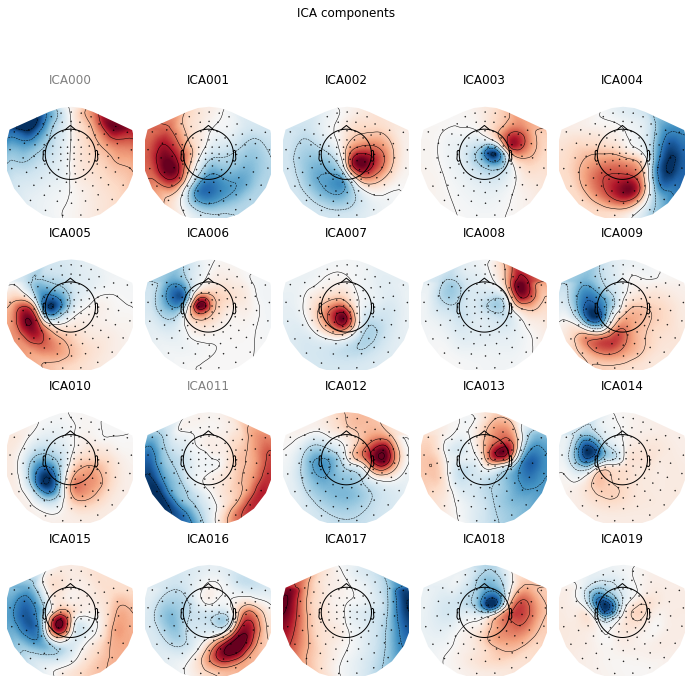

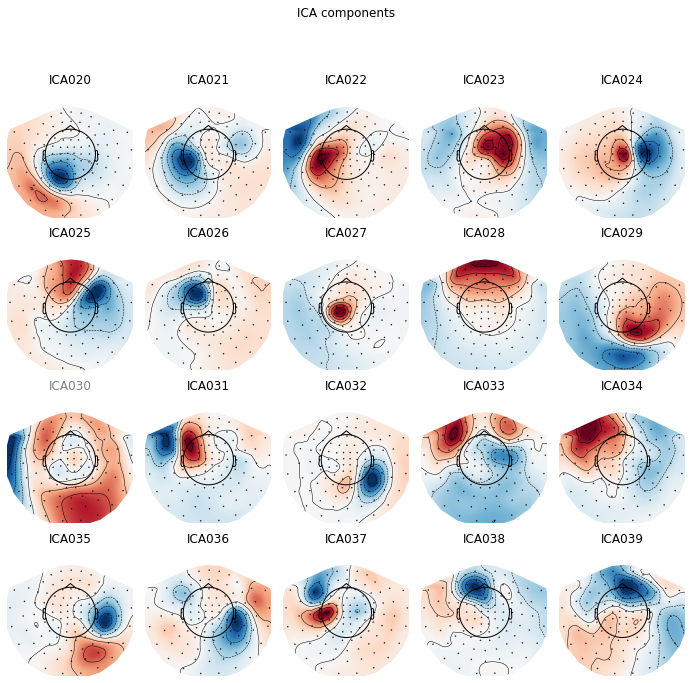

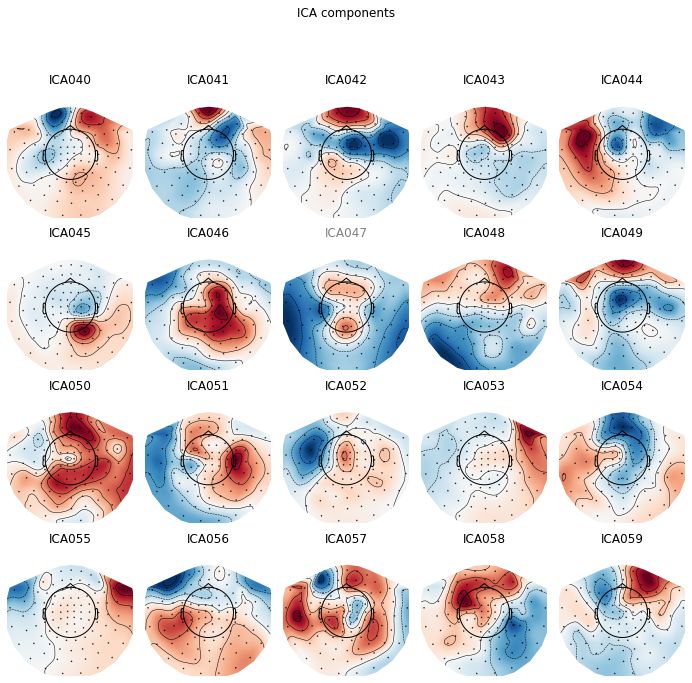

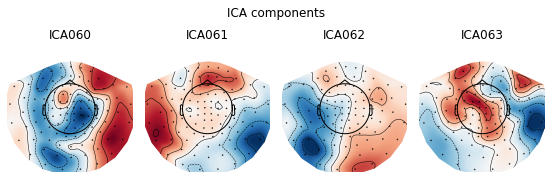

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 561.6x187.56 with 4 Axes>]

In [9]:
ica.plot_components()

In [2]:
dataset_path = os.path.join('rich_data', 'subj2', 'sess4', 'oslpy', 'task_part1_4_tsss_mc_preproc_raw.fif')
raw = mne.io.read_raw_fif(dataset_path, preload=False)
events = mne.find_events(raw, min_duration=0.002)
epochs = mne.Epochs(raw,
                    events,
                    event_id=[2,3,4,5,6,7,8,11,12,13,14,15],
                    tmin=-0.1,
                    tmax=1.0,
                    baseline=(None, 0),
                    reject=None,
                    picks="meg",
                    decim=10,
                    preload=True)

/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_75333/3764435544.py:4: RuntimeWarning: The measurement information indicates a low-pass frequency of 40 Hz. The decim=10 parameter will result in a sampling frequency of 100 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw,


In [4]:
# load epochs
dataset_path = os.path.join('rich_data', 'RC', 'oslpy', 'task_part1_rc_raw_tsss_mc_epo.fif')
epochs = mne.read_epochs(dataset_path, preload=False)

## Epoch analysis

In [2]:
epochs = dataset['epochs']

NameError: name 'dataset' is not defined

In [4]:
epochs

<EpochsFIF |  1803 events (all good), -0.1 - 1 sec, baseline off, ~6.4 MB, data not loaded,
 'words/hungry': 32
 'words/tired': 39
 'words/thirsty': 31
 'words/toilet': 36
 'words/pain': 36
 'think': 155
 'cue': 1321
 'twords/hungry': 57
 'twords/tired': 22
 'twords/thirsty': 25
 and 2 more events ...>

In [ ]:
for i in range(200):
    print(epochs[i].event_id)

In [23]:
for i in range(200):
    print(dataset['events'][i])

[93459     0     1]
[94317     0     8]
[95135     0     1]
[95999     0     5]
[96879     0     1]
[97754     0     8]
[98563     0     1]
[99566     0     6]
[100440      0      1]
[101410      0      8]
[102241      0      1]
[103291      0      2]
[104185      0      1]
[105019      0      8]
[105953      0      1]
[106848      0      3]
[107785      0      1]
[108655      0      8]
[109489      0      1]
[131123      0    256]
[133336      0      6]
[134210      0      1]
[135062      0      8]
[135866      0      1]
[136765      0      5]
[137708      0      1]
[138547      0      8]
[139523      0      1]
[140425      0      4]
[141316      0      1]
[142151      0      8]
[143101      0      1]
[144070      0      3]
[144873      0      1]
[145845      0      8]
[146696      0      1]
[147691      0      2]
[148648      0      1]
[149517      0      8]
[150474      0      1]
[151435      0      5]
[152259      0      1]
[153188      0      8]
[154111      0      1]
[155088     

In [31]:
epochs['words'].plot_image(['MEG1711'])
epochs['cue'].plot_image(['MEG1711'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[<Figure size 1224x864 with 4 Axes>]

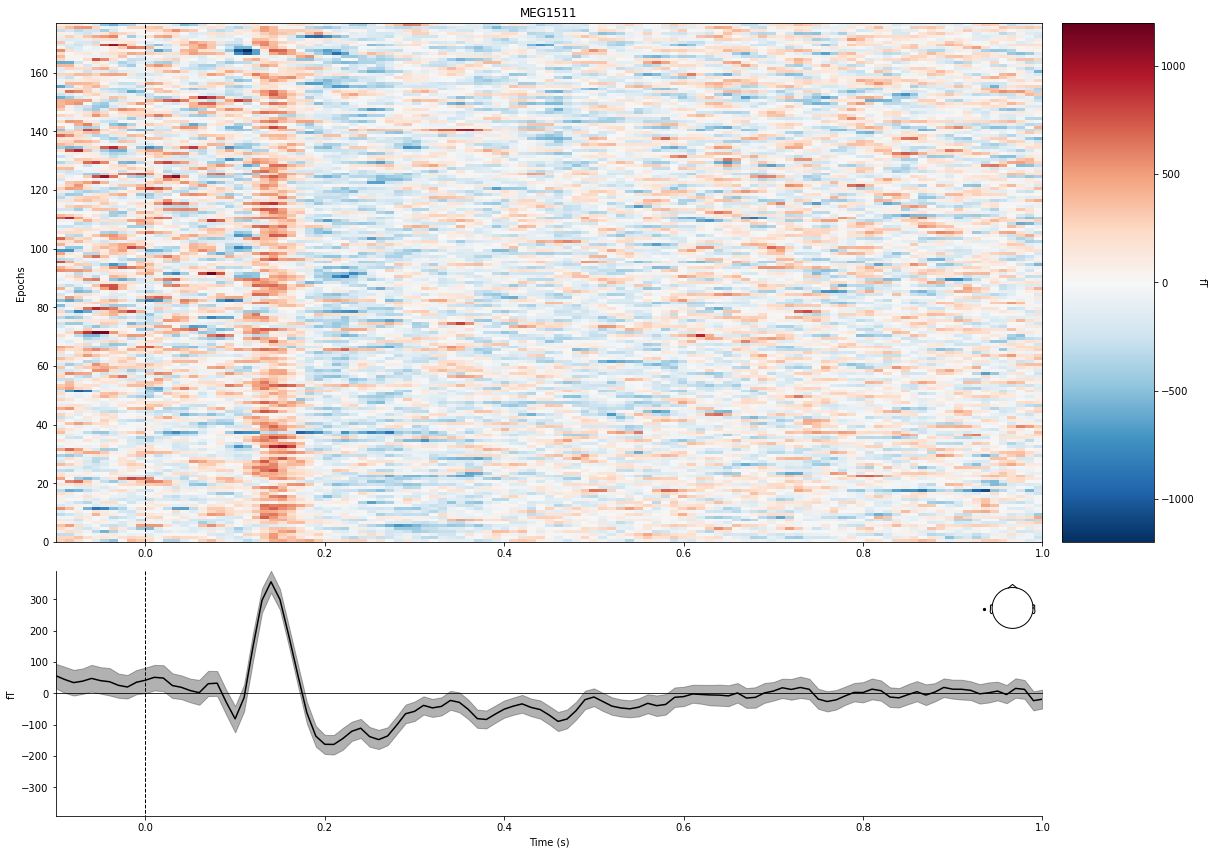

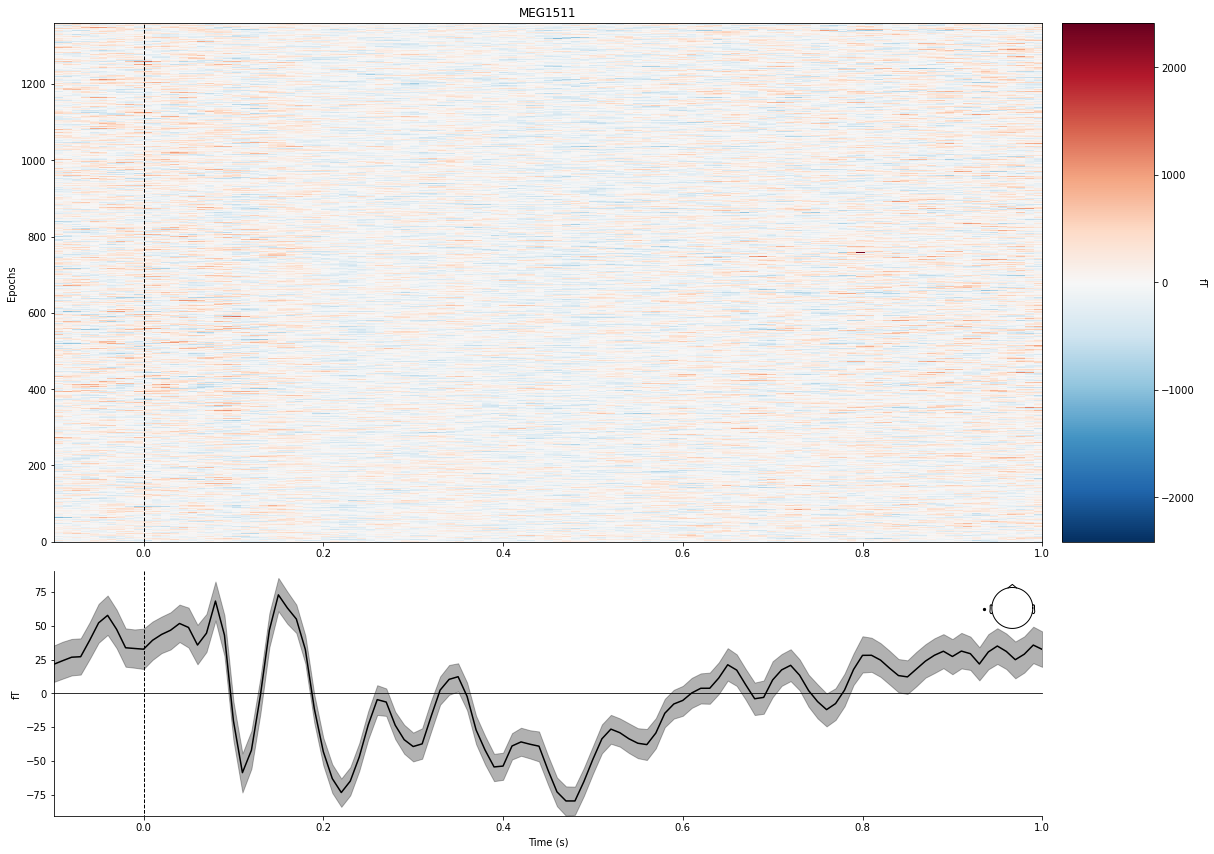

[<Figure size 1224x864 with 4 Axes>]

In [15]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [17, 12]
epochs['words'].plot_image(['MEG1511'])
epochs['cue'].plot_image(['MEG1511'])

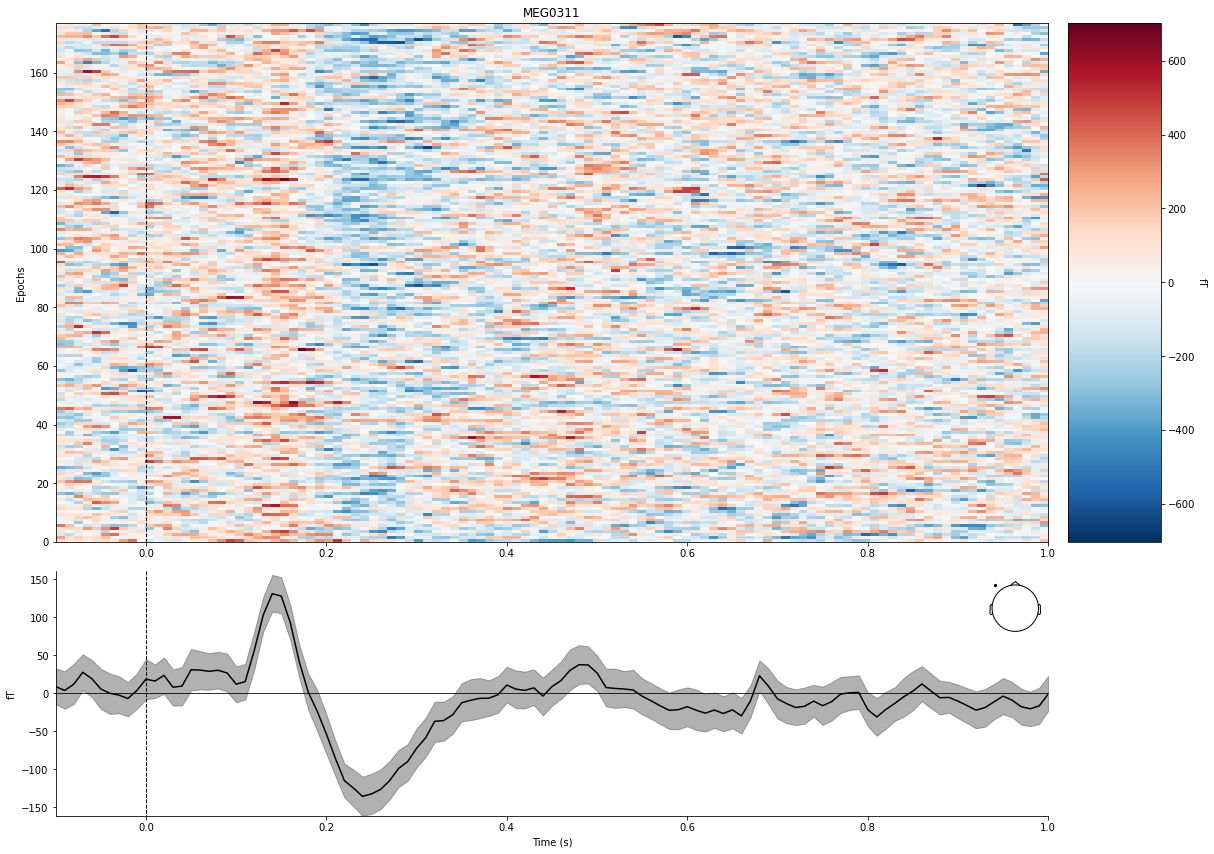

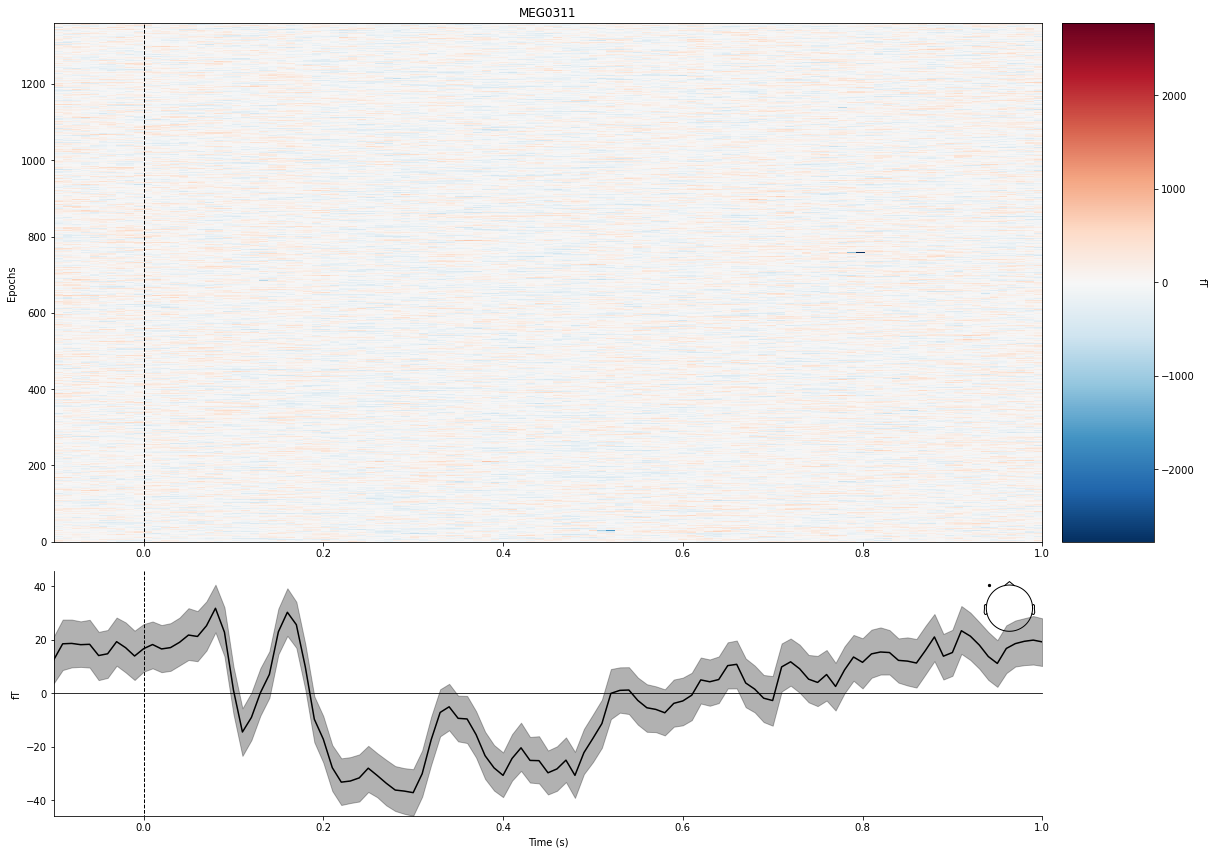

[<Figure size 1224x864 with 4 Axes>]

In [16]:
epochs['words'].plot_image(['MEG0311'])
epochs['cue'].plot_image(['MEG0311'])

In [6]:
ch_dict = dict([(ch, i) for i, ch in enumerate(epochs.ch_names)])

In [6]:
selected_chs = ['MEG0111', 'MEG0121', 'MEG0131', 'MEG0141', 'MEG0211', 'MEG0221', 'MEG0231', 'MEG0241', 'MEG0311', 'MEG0321', 'MEG0341', 'MEG0411', 'MEG0441', 'MEG1511', 'MEG1521', 'MEG1531', 'MEG1541', 'MEG1611', 'MEG1621', 'MEG1631', 'MEG1641', 'MEG1721', 'MEG1811',
                'MEG1121', 'MEG1131', 'MEG1211', 'MEG1221', 'MEG1231', 'MEG1241', 'MEG1311', 'MEG1321', 'MEG1331', 'MEG1341', 'MEG1411', 'MEG1421', 'MEG1431', 'MEG1441', 'MEG2221', 'MEG2411', 'MEG2421', 'MEG2431', 'MEG2441', 'MEG2521', 'MEG2611', 'MEG2621', 'MEG2631', 'MEG2641']

In [19]:
selected_chs = ['MEG0111','MEG0112','MEG0113','MEG0121','MEG0122','MEG0123','MEG0131','MEG0132','MEG0133','MEG0141','MEG0142','MEG0143','MEG0211','MEG0212','MEG0213','MEG1411','MEG1412','MEG1413','MEG1511','MEG1512','MEG1513','MEG1641','MEG1642','MEG1643','MEG1721','MEG1722','MEG1723','MEG1731','MEG1732','MEG1733','MEG2111','MEG2112','MEG2113','MEG2131','MEG2132','MEG2133','MEG2311','MEG2312','MEG2313','MEG2321','MEG2322','MEG2323','MEG2331','MEG2332','MEG2333','MEG2411','MEG2412','MEG2413','MEG2431','MEG2432','MEG2433','MEG2441','MEG2442','MEG2443','MEG2511','MEG2512','MEG2513','MEG2521','MEG2522','MEG2523','MEG2531','MEG2532','MEG2533','MEG2541','MEG2542','MEG2543','MEG2631','MEG2632','MEG2633']

In [1]:
selected_chs = ['MEG0132', 'MEG0441', 'MEG1343', 'MEG0323', 'MEG1331', 'MEG1412', 'MEG1232', 'MEG1322', 'MEG1411', 'MEG2441', 'MEG1131', 'MEG2442', 'MEG0342', 'MEG2641', 'MEG2411', 'MEG1332', 'MEG1542', 'MEG0412', 'MEG0131', 'MEG0621', 'MEG1633', 'MEG1541', 'MEG1413', 'MEG1222', 'MEG0322', 'MEG1133', 'MEG1231', 'MEG1311', 'MEG1341', 'MEG0622', 'MEG1522', 'MEG0321', 'MEG2223', 'MEG1612', 'MEG0311', 'MEG1813', 'MEG1221', 'MEG0221', 'MEG2643', 'MEG2221', 'MEG0442', 'MEG1811', 'MEG1812', 'MEG0313', 'MEG1533', 'MEG0231', 'MEG1323', 'MEG1333', 'MEG0222', 'MEG1621', 'MEG2412', 'MEG0121', 'MEG2423', 'MEG1132', 'MEG0331', 'MEG2443', 'MEG2222', 'MEG0341', 'MEG0232', 'MEG0333', 'MEG0443', 'MEG1223', 'MEG0411', 'MEG1313', 'MEG2421', 'MEG1312', 'MEG0122', 'MEG1531', 'MEG0413', 'MEG1632', 'MEG0233', 'MEG0623', 'MEG0123', 'MEG1623', 'MEG1321', 'MEG2413', 'MEG1233', 'MEG1613', 'MEG0332', 'MEG0343', 'MEG1622', 'MEG2422', 'MEG2642', 'MEG1543', 'MEG0133', 'MEG1631', 'MEG1521', 'MEG1611', 'MEG0312', 'MEG1523', 'MEG1532', 'MEG0223', 'MEG1342']

In [7]:
selected_inds = []
for ch in selected_chs:
    selected_inds.append(ch_dict[ch])
    #selected_inds.append(ch_dict[ch[:-1] + '2'])
    #selected_inds.append(ch_dict[ch[:-1] + '3'])

In [9]:
selected_inds = [str(i) for i in selected_inds]
print(','.join(selected_inds))

7,45,149,29,144,151,133,142,150,279,120,280,34,303,270,145,172,37,6,63,182,171,152,130,28,122,132,138,147,64,166,27,251,175,24,200,129,15,305,249,46,198,199,26,170,18,143,146,16,177,271,3,275,121,30,281,250,33,19,32,47,131,36,140,273,139,4,168,38,181,20,65,5,179,141,272,134,176,31,35,178,274,304,173,8,180,165,174,25,167,169,17,148


In [12]:
len(selected_inds)

94

In [36]:
cue_evoked = epochs['cue'].average()
word_evoked = epochs['words'].average()

In [48]:
cue_evoked = epochs['cue'].average()
cue_ev = cue_evoked.get_data()

In [49]:
inds = [i for i in range(306) if i%3]
cue_ev = cue_ev[inds, :]

In [50]:
cue_ev.shape

(204, 111)

In [51]:
data = cue_ev.reshape(cue_ev.shape[0] // 2, 2, -1)
data = np.sqrt(np.sum(data ** 2, axis=1) / 2)

In [62]:
# look for channels with high avg power
selected_inds = []
for i in range(data.shape[0]):
    large_chn = np.average(data[i])
    #print(large_chn)
    if large_chn > 3e-13:
        selected_inds.append(i)

len(selected_inds)

63

In [41]:
data[10,10]

5.196539946031978e-13

In [44]:
# look for channels with peaks above treshold
selected_inds = []
for i in range(data.shape[0]):
    large_chn = sum(data[i] > 6e-13)
    if large_chn > 10:
        selected_inds.append(i)

len(selected_inds)

24

In [63]:
inds = []
for i in selected_inds:
    v = i*3
    inds.extend([v, v+1, v+2])

print('\',\''.join(np.array(epochs.ch_names)[inds]))

MEG0121','MEG0122','MEG0123','MEG0131','MEG0132','MEG0133','MEG0221','MEG0222','MEG0223','MEG0231','MEG0232','MEG0233','MEG0311','MEG0312','MEG0313','MEG0321','MEG0322','MEG0323','MEG0331','MEG0332','MEG0333','MEG0341','MEG0342','MEG0343','MEG0411','MEG0412','MEG0413','MEG0421','MEG0422','MEG0423','MEG0431','MEG0432','MEG0433','MEG0441','MEG0442','MEG0443','MEG0621','MEG0622','MEG0623','MEG0631','MEG0632','MEG0633','MEG0711','MEG0712','MEG0713','MEG0721','MEG0722','MEG0723','MEG0731','MEG0732','MEG0733','MEG0741','MEG0742','MEG0743','MEG1041','MEG1042','MEG1043','MEG1131','MEG1132','MEG1133','MEG1221','MEG1222','MEG1223','MEG1231','MEG1232','MEG1233','MEG1311','MEG1312','MEG1313','MEG1321','MEG1322','MEG1323','MEG1331','MEG1332','MEG1333','MEG1341','MEG1342','MEG1343','MEG1411','MEG1412','MEG1413','MEG1521','MEG1522','MEG1523','MEG1531','MEG1532','MEG1533','MEG1541','MEG1542','MEG1543','MEG1611','MEG1612','MEG1613','MEG1621','MEG1622','MEG1623','MEG1631','MEG1632','MEG1633','MEG1641','

In [46]:
print(inds)

[18, 19, 20, 24, 25, 26, 45, 46, 47, 72, 73, 74, 138, 139, 140, 141, 142, 143, 147, 148, 149, 177, 178, 179, 180, 181, 182, 183, 184, 185, 189, 190, 191, 198, 199, 200, 207, 208, 209, 210, 211, 212, 213, 214, 215, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 255, 256, 257, 267, 268, 269, 276, 277, 278, 285, 286, 287]


In [19]:
%matplotlib widget
cue_evoked.plot_topo()
#word_evoked.plot_topo()
a=0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

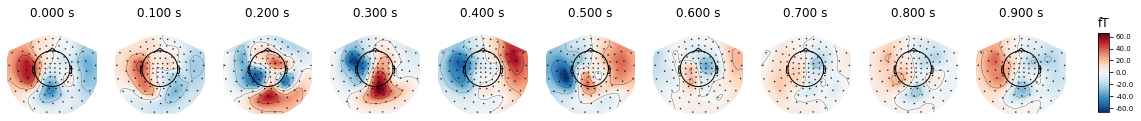

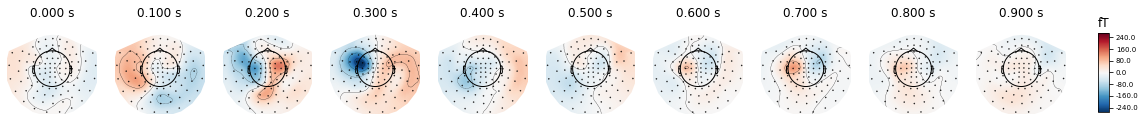

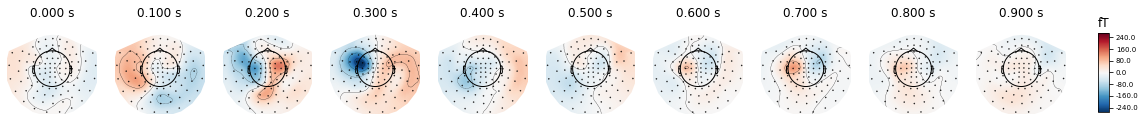

In [20]:
%matplotlib inline
times = np.arange(0,1,0.1)
cue_evoked.plot_topomap(times, ch_type='mag', average=0.1)
word_evoked.plot_topomap(times, ch_type='mag', average=0.1)

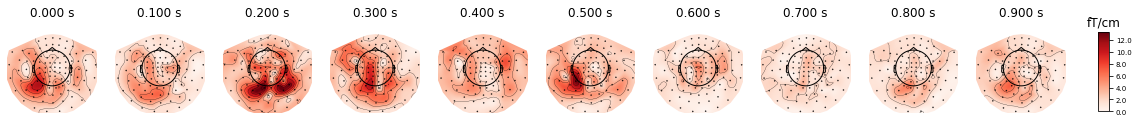

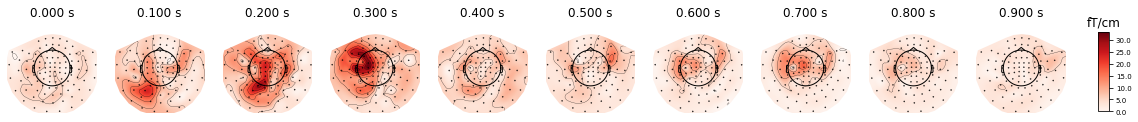

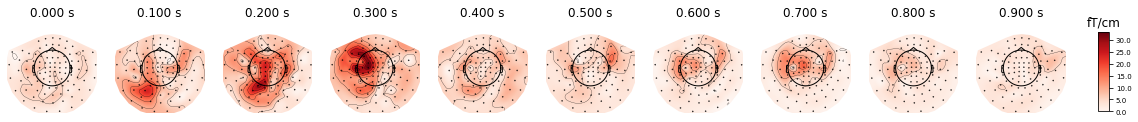

In [21]:
times = np.arange(0,1,0.1)
cue_evoked.plot_topomap(times, ch_type='grad', average=0.1)
word_evoked.plot_topomap(times, ch_type='grad', average=0.1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

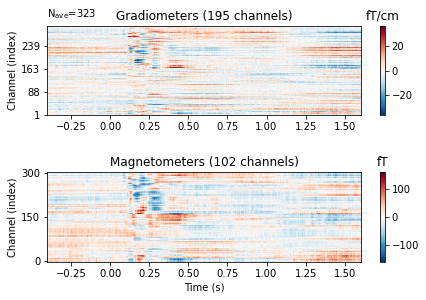

In [60]:
# more functions from mne
%matplotlib widget
plt.rcParams['figure.figsize'] = [20, 12]
cue_evoked.plot_image()
word_evoked.plot_image()

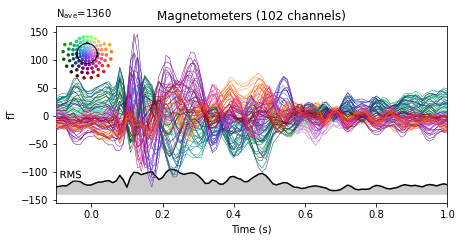

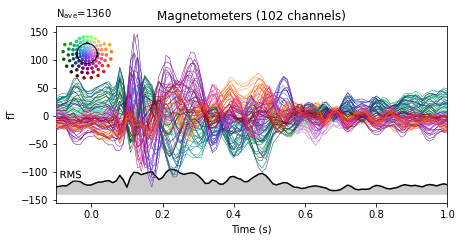

In [22]:
cue_evoked.plot(picks='mag', spatial_colors=True, gfp=True)

In [24]:
%matplotlib widget
cue_evoked.plot_joint(times=[0.09, 0.14, 0.2, 0.25, 0.33, 0.45], picks='mag')
word_evoked.plot_joint(times=[0.133, 0.17, 0.19, 0.21, 0.29, 0.45], picks='mag')
a=0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

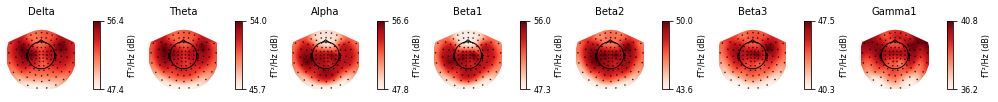

In [26]:
epochs['cue'].plot_psd_topomap(bands = [(0, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'),
         (12, 16, 'Beta1'), (16, 20, 'Beta2'), (20, 30, 'Beta3'), (30, 50, 'Gamma1')])

In [30]:
evk = {}
for word in ['hungry', 'thirsty', 'tired', 'toilet', 'pain']:
    evk[word] = epochs['words/' + word].average()

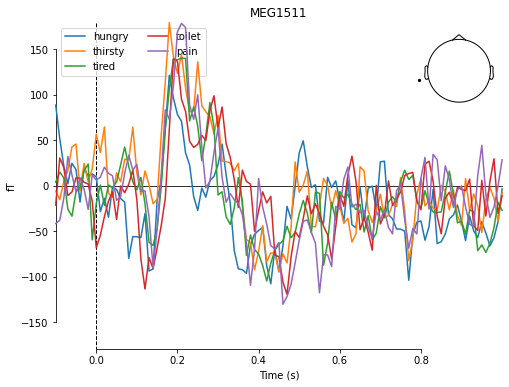

[<Figure size 576x432 with 2 Axes>]

In [32]:
mne.viz.plot_compare_evokeds(evk, picks='MEG1511')